In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string


# Load Data
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

rating_df = pd.read_csv(rating_url)
user_emb = pd.read_csv(user_emb_url)
item_emb = pd.read_csv(item_emb_url)

# Merge dataframes to substitute user and items from ids with their embedding vectors
merged_df = pd.merge(rating_df, user_emb, how='left', on='user').fillna(0)
merged_df = pd.merge(merged_df, item_emb, how='left', on='item').fillna(0)

# Element-wise add user features (column labels starting with "UFeature") and item features (CFeature)
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
interaction_dataset = user_embeddings + course_embeddings.values
interaction_dataset.columns = [f"Feature{i}" for i in range(16)]
interaction_dataset['rating'] = ratings

# Use LabelEncoder to encode rating into categorical
X = interaction_dataset.iloc[:, :-1]  # all rows and columns except last col (rating)
y_raw = interaction_dataset.iloc[:, -1]  # ratings column as num

# Transform column into cat
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw.values.ravel())

def build_model(input_shape, layers, units):
  # Define the model architecture
    model = keras.Sequential()
    for layer in range(layers):
        model.add(keras.layers.Dense(units, input_shape=(input_shape,), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Compile the model with an Adam optimizer, a binary cross-entropy loss function, and the F1 metric
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create a KerasClassifier object that wraps the model
model_wrapper = KerasClassifier(build_fn=build_model, input_shape=X.shape[1])

# Define a parameter grid for the number of layers and units
param_grid = {
    'layers': [1, 2, 3],
    'units': [32, 64, 128]
}


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3, scoring='f1_micro')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# best parameters and score
gs_best_param = grid_search.best_params_
gs_best_score = grid_search.best_score_

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set using F1 score
y_pred = best_model.predict(X_test)
f1_model_1 = f1_score(y_test, y_pred)


1459/1459 [==============================] - 1s 550us/step


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string


# Load Data
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

rating_df = pd.read_csv(rating_url)
user_emb = pd.read_csv(user_emb_url)
item_emb = pd.read_csv(item_emb_url)

# Merge dataframes to substitute user and items from ids with their embedding vectors
merged_df = pd.merge(rating_df, user_emb, how='left', on='user').fillna(0)
merged_df = pd.merge(merged_df, item_emb, how='left', on='item').fillna(0)

# Element-wise add user features (column labels starting with "UFeature") and item features (CFeature)
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
interaction_dataset = user_embeddings + course_embeddings.values
interaction_dataset.columns = [f"Feature{i}" for i in range(16)]
interaction_dataset['rating'] = ratings

# Use LabelEncoder to encode rating into categorical
X = interaction_dataset.iloc[:, :-1]  # all rows and columns except last col (rating)
y_raw = interaction_dataset.iloc[:, -1]  # ratings column as num

# Transform column into cat
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw.values.ravel())

def build_model(input_shape, layers, units):
  # Define the model architecture
    model = keras.Sequential()
    for layer in range(layers):
        model.add(keras.layers.Dense(units, input_shape=(input_shape,), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Compile the model with an Adam optimizer, a binary cross-entropy loss function, and the F1 metric
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create a KerasClassifier object that wraps the model
model_wrapper = KerasClassifier(build_fn=build_model, input_shape=X.shape[1])

# Define a parameter grid for the number of layers and units
param_grid = {
    'layers': [1, 2, 3],
    'units': [32, 64, 128]
}


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3, scoring='f1_micro')

# Fit the model to the training data
grid_search.fit(X_train, y_train, epochs = 10)

# best parameters and score
gs_best_param = grid_search.best_params_
gs_best_score = grid_search.best_score_

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set using F1 score
y_pred = best_model.predict(X_test)
f1_model_2 = f1_score(y_test, y_pred)


Epoch 1/10
3889/3889 [==============================] - 3s 641us/step - loss: 0.2014
Epoch 2/10
3889/3889 [==============================] - 3s 680us/step - loss: 0.1657
Epoch 3/10
3889/3889 [==============================] - 2s 643us/step - loss: 0.1407
Epoch 4/10
3889/3889 [==============================] - 3s 645us/step - loss: 0.1214
Epoch 5/10
3889/3889 [==============================] - 3s 653us/step - loss: 0.1099
Epoch 6/10
3889/3889 [==============================] - 3s 671us/step - loss: 0.1026
Epoch 7/10
3889/3889 [==============================] - 3s 678us/step - loss: 0.0984
Epoch 8/10
3889/3889 [==============================] - 3s 701us/step - loss: 0.0959
Epoch 9/10
3889/3889 [==============================] - 3s 677us/step - loss: 0.0942
Epoch 10/10
1945/1945 [==============================] - 1s 513us/step
Epoch 1/10
3889/3889 [==============================] - 3s 650us/step - loss: 0.2011
Epoch 2/10
3889/3889 [==============================] - 2s 640us/step - loss: 0

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string


# Load Data
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

rating_df = pd.read_csv(rating_url)
user_emb = pd.read_csv(user_emb_url)
item_emb = pd.read_csv(item_emb_url)

# Merge dataframes to substitute user and items from ids with their embedding vectors
merged_df = pd.merge(rating_df, user_emb, how='left', on='user').fillna(0)
merged_df = pd.merge(merged_df, item_emb, how='left', on='item').fillna(0)

# Element-wise add user features (column labels starting with "UFeature") and item features (CFeature)
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
interaction_dataset = user_embeddings + course_embeddings.values
interaction_dataset.columns = [f"Feature{i}" for i in range(16)]
interaction_dataset['rating'] = ratings

# Use LabelEncoder to encode rating into categorical
X = interaction_dataset.iloc[:, :-1]  # all rows and columns except last col (rating)
y_raw = interaction_dataset.iloc[:, -1]  # ratings column as num

# Transform column into cat
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw.values.ravel())

def build_model(input_shape, layers, units):
  # Define the model architecture
    model = keras.Sequential()
    for layer in range(layers):
        model.add(keras.layers.Dense(units, input_shape=(input_shape,), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Compile the model with an Adam optimizer, a binary cross-entropy loss function, and the F1 metric
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


# Create a KerasClassifier object that wraps the model
model_wrapper = KerasClassifier(build_fn=build_model, input_shape=X.shape[1])

# Define a parameter grid for the number of layers and units
param_grid = {
    'layers': [1, 2, 3],
    'units': [32, 64, 128]
}


# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3, scoring='f1_micro')

# Fit the model to the training data
grid_search.fit(X_train, y_train, epochs = 20)

# best parameters and score
gs_best_param = grid_search.best_params_
gs_best_score = grid_search.best_score_

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set using F1 score
y_pred = best_model.predict(X_test)
f1_model_3 = f1_score(y_test, y_pred)


Epoch 1/20
2917/2917 [==============================] - 2s 706us/step - loss: 0.2030
Epoch 2/20
2917/2917 [==============================] - 2s 753us/step - loss: 0.1768
Epoch 3/20
2917/2917 [==============================] - 2s 694us/step - loss: 0.1670
Epoch 4/20
2917/2917 [==============================] - 2s 680us/step - loss: 0.1536
Epoch 5/20
2917/2917 [==============================] - 2s 681us/step - loss: 0.1373
Epoch 6/20
2917/2917 [==============================] - 2s 691us/step - loss: 0.1214
Epoch 7/20
2917/2917 [==============================] - 2s 691us/step - loss: 0.1106
Epoch 8/20
2917/2917 [==============================] - 2s 682us/step - loss: 0.1036
Epoch 9/20
2917/2917 [==============================] - 2s 719us/step - loss: 0.0990
Epoch 10/20
2917/2917 [==============================] - 2s 720us/step - loss: 0.0960
Epoch 11/20
2917/2917 [==============================] - 2s 683us/step - loss: 0.0940
Epoch 12/20
2917/2917 [==============================] - 2s 695

In [4]:
f1_values = [f1_model_1, f1_model_2, f1_model_3]

maximum = max(f1_values)
position = f1_values.index(maximum)
minimum = min(f1_values)
print(maximum)
print(minimum)
print(f1_values[position])



0.9920431829507976
0.9894162135553018
0.9920431829507976


[]

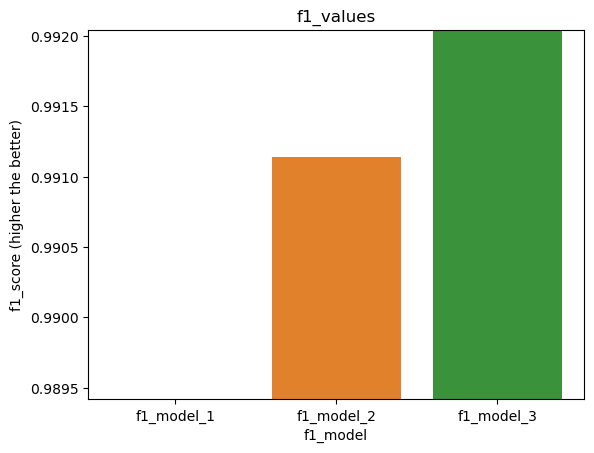

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
f1_names = ["f1_model_1", "f1_model_2", "f1_model_3"]
# create a dataframe with the values and names
df_f1 = pd.DataFrame({'f1_score (higher the better)': f1_values, 'f1_model': f1_names})

# use seaborn to plot the bar chart
sns.barplot(x='f1_model', y='f1_score (higher the better)', data=df_f1)
plt.ylim(minimum, maximum)
plt.title('f1_values')
plt.plot()